# Install required libraries.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing Dataset

In [12]:
df = pd.read_csv('house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [13]:
df = df.drop(['Home'], axis=1)
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [14]:
df.shape

(128, 7)

There are 128 observations and 6 features + 1 target variable(price).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


The above info function provide the information about the dataset .
For example:
* Missing values(no missing values in our dataset)
* datatype(5 of them are floats and 2 is categorical)

In [8]:
# Perform one-hot encoding for categorical columns
#df = pd.get_dummies(df, columns=["Brick", "Neighborhood"])

In [18]:
# Replace "No" with 0 and "Yes" with 1 in the "Brick" column
df['Brick'] = df['Brick'].replace({'No': 0, 'Yes': 1})
df.tail()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,119700,1900,3,3,3,1,East
124,147900,2160,4,3,3,1,East
125,113500,2070,2,2,2,0,North
126,149900,2020,3,3,1,0,West
127,124600,2250,3,3,4,0,North


In [19]:
df_l = df.drop(['Neighborhood'],axis=1)

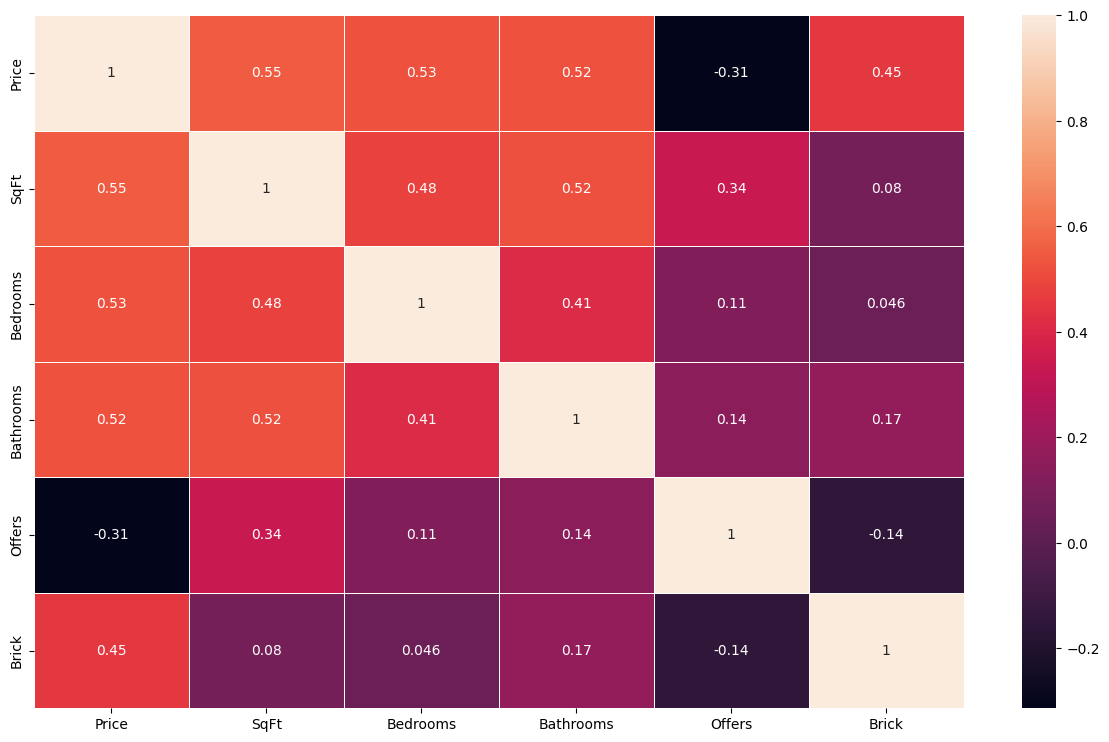

In [20]:
# Pearson correlation
plt.subplots(figsize=(15, 9))
cor = df_l.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()

If we have to select a single variable for the regression analysis then
higher possibility is to pick the most correlated feature with the target variable(**price**).
* In our case it is the **Sq.Ft.** with correlation coefficent of **0.55**

In [22]:
# taking two variables
data = df_l.drop(['Bedrooms','Bathrooms','Offers','Brick'], axis=1)
data.head()

,Price,SqFt
0,114300,1790
1,114200,2030
2,114800,1740
3,94700,1980
4,119800,2130


In [33]:
X_l = data.iloc[:,-1].values.reshape(-1,1)
X_l

array([[1790],
       [2030],
       [1740],
       [1980],
       [2130],
       [1780],
       [1830],
       [2160],
       [2110],
       [1730],
       [2030],
       [1870],
       [1910],
       [2150],
       [2590],
       [1780],
       [2190],
       [1990],
       [1700],
       [1920],
       [1790],
       [2000],
       [1690],
       [1820],
       [2210],
       [2290],
       [2000],
       [1700],
       [1600],
       [2040],
       [2250],
       [1930],
       [2250],
       [2280],
       [2000],
       [2080],
       [1880],
       [2420],
       [1720],
       [1740],
       [1560],
       [1840],
       [1990],
       [1920],
       [1940],
       [1810],
       [1990],
       [2050],
       [1980],
       [1700],
       [2100],
       [1860],
       [2150],
       [2100],
       [1650],
       [1720],
       [2190],
       [2240],
       [1840],
       [2090],
       [2200],
       [1610],
       [2220],
       [1910],
       [1860],
       [1450],
       [22

In [25]:
Y_l = data.iloc[:,0:1].values
Y_l

array([[114300],
       [114200],
       [114800],
       [ 94700],
       [119800],
       [114600],
       [151600],
       [150700],
       [119200],
       [104000],
       [132500],
       [123000],
       [102600],
       [126300],
       [176800],
       [145800],
       [147100],
       [ 83600],
       [111400],
       [167200],
       [116200],
       [113800],
       [ 91700],
       [106100],
       [156400],
       [149300],
       [137000],
       [ 99300],
       [ 69100],
       [188000],
       [182000],
       [112300],
       [135000],
       [139600],
       [117800],
       [117100],
       [117500],
       [147000],
       [131300],
       [108200],
       [106600],
       [133600],
       [105600],
       [154000],
       [166500],
       [103200],
       [129800],
       [ 90300],
       [115900],
       [107500],
       [151100],
       [ 91100],
       [117400],
       [130800],
       [ 81300],
       [125700],
       [140900],
       [152300],
       [138100

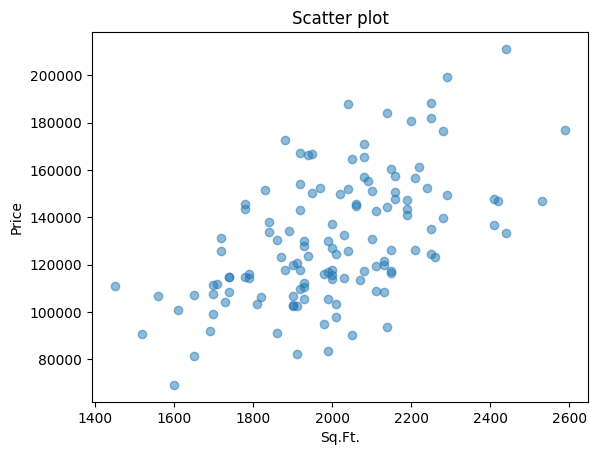

In [26]:
plt.scatter(X_l, Y_l, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Sq.Ft.')
plt.ylabel('Price')
plt.show()

Using this scatter plot we can infer that if a house has higher Sq. Ft. area then that house may have more expensive.
There is somewhat positive linear relationship between them.

## MODEL 1

## USING SIMPLE LINEAR REGRESSION

In [34]:
from sklearn.model_selection import train_test_split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_l, Y_l, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
simple_model = LinearRegression()

# Fit the data(train the model)
simple_model.fit(Xl_train, yl_train)

LinearRegression()

In [36]:
# Predict
y_predicted = simple_model.predict(Xl_test)

# model evaluation
rmse = np.sqrt(mean_squared_error(yl_test, y_predicted))
r2 = r2_score(yl_test, y_predicted)

In [38]:
# printing values
print('Slope:' ,simple_model.coef_)
print('Intercept:', simple_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[70.88361304]]
Intercept: [-10062.74046837]
Root mean squared error:  21778.503395446114
R2 score:  0.267641411848063


>  **Interpretation**:

This simple linear regression with single variable (y = mx+b) has 
* Slope of the line(m) : [[70.88361304]]
* Intercept (b) : [-10062.74046837]
* R2 score: 0.267641411848063  (For R2 score more is better in the range [0,1])
* Root mean squared error: 21778.503395446114 (Lower is better)


**The plot of simple linear regression :**

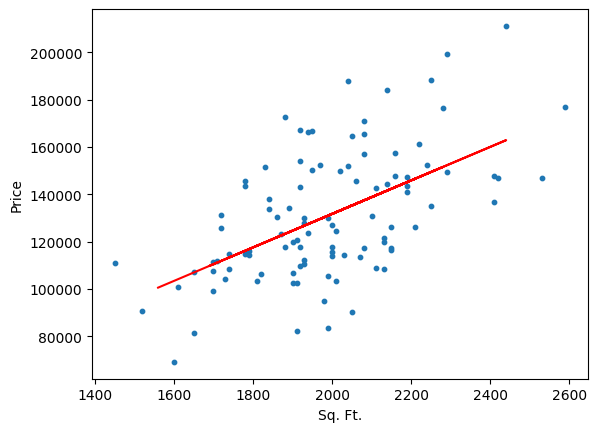

In [39]:
# data points
plt.scatter(Xl_train, yl_train, s=10)
plt.xlabel('Sq. Ft.')
plt.ylabel('Price')

# predicted values
plt.plot(Xl_test, y_predicted, color='r')
plt.show()

## MODEL 2

## MULTIPLE LINEAR REGRESSION !

In [43]:
df_l.tail()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
123,119700,1900,3,3,3,1
124,147900,2160,4,3,3,1
125,113500,2070,2,2,2,0
126,149900,2020,3,3,1,0
127,124600,2250,3,3,4,0


In [48]:
x_m = df_l.drop(['Price'],axis=1).values
x_m

array([[1790,    2,    2,    2,    0],
       [2030,    4,    2,    3,    0],
       [1740,    3,    2,    1,    0],
       [1980,    3,    2,    3,    0],
       [2130,    3,    3,    3,    0],
       [1780,    3,    2,    2,    0],
       [1830,    3,    3,    3,    1],
       [2160,    4,    2,    2,    0],
       [2110,    4,    2,    3,    0],
       [1730,    3,    3,    3,    0],
       [2030,    3,    2,    3,    1],
       [1870,    2,    2,    2,    1],
       [1910,    3,    2,    4,    0],
       [2150,    3,    3,    5,    1],
       [2590,    4,    3,    4,    0],
       [1780,    4,    2,    1,    0],
       [2190,    3,    3,    4,    1],
       [1990,    3,    3,    4,    0],
       [1700,    2,    2,    1,    1],
       [1920,    3,    3,    2,    1],
       [1790,    3,    2,    3,    0],
       [2000,    3,    2,    4,    0],
       [1690,    3,    2,    3,    0],
       [1820,    3,    2,    3,    1],
       [2210,    4,    3,    2,    1],
       [2290,    4,    3,

In [50]:
y_m = df_l['Price'].values
y_m

array([114300, 114200, 114800,  94700, 119800, 114600, 151600, 150700,
       119200, 104000, 132500, 123000, 102600, 126300, 176800, 145800,
       147100,  83600, 111400, 167200, 116200, 113800,  91700, 106100,
       156400, 149300, 137000,  99300,  69100, 188000, 182000, 112300,
       135000, 139600, 117800, 117100, 117500, 147000, 131300, 108200,
       106600, 133600, 105600, 154000, 166500, 103200, 129800,  90300,
       115900, 107500, 151100,  91100, 117400, 130800,  81300, 125700,
       140900, 152300, 138100, 155400, 180900, 100900, 161300, 120500,
       130300, 111100, 126200, 151900,  93600, 165600, 166700, 157600,
       107300, 125700, 144200, 106900, 129800, 176500, 121300, 143600,
       143400, 184300, 164800, 147700,  90500, 188300, 102700, 172500,
       127700,  97800, 143100, 116500, 142600, 157100, 160600, 152500,
       133300, 126800, 145500, 171000, 103200, 123100, 136800, 211200,
        82300, 146900, 108500, 134000, 117000, 108700, 111600, 114900,
      

In [51]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(x_m, y_m, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
multiple_model = LinearRegression()

# Fit the data(train the model)
multiple_model.fit(Xm_train, ym_train)

LinearRegression()

In [53]:
# Predict
y_predictedm = multiple_model.predict(Xm_test)

# model evaluation
rmse = np.sqrt(mean_squared_error(ym_test, y_predictedm))
r2 = r2_score(ym_test, y_predictedm)

In [54]:
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  13346.928621871499
R2 score:  0.724938130407125


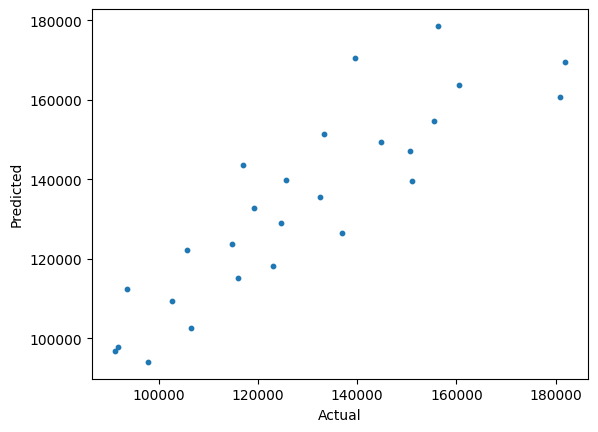

In [57]:
# data points
plt.scatter(ym_test, y_predictedm, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [59]:
pred_y_Df = pd.DataFrame({'Actual_value':ym_test, 'Predicted_value':y_predictedm, 'Difference':ym_test-y_predictedm})
pred_y_Df

,Actual_value,Predicted_value,Difference
0,106600,102579.172085,4020.827915
1,156400,178580.753938,-22180.753938
2,102700,109308.923597,-6608.923597
3,91100,96880.631356,-5780.631356
4,119200,132868.885653,-13668.885653
5,117000,143642.580135,-26642.580135
6,124600,129049.566505,-4449.566505
7,133300,151458.934578,-18158.934578
8,125700,139925.780157,-14225.780157
9,150700,147224.095846,3475.904154


## MODEL 3

## POLYNOMIAL REGRESSION  X_l Y_l

In [61]:
from sklearn.model_selection import train_test_split
xp_train, xp_test, yp_train, yp_test = train_test_split(X_l, Y_l, test_size = 0.2, random_state = 42)

In [73]:
# Add the polynomial term to the equation/model.

from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree=3)

x_polynom = polynom.fit_transform(xp_train)

x_polynom

array([[1.0000000e+00, 1.9500000e+03, 3.8025000e+06, 7.4148750e+09],
       [1.0000000e+00, 2.1300000e+03, 4.5369000e+06, 9.6635970e+09],
       [1.0000000e+00, 2.0500000e+03, 4.2025000e+06, 8.6151250e+09],
       [1.0000000e+00, 1.7900000e+03, 3.2041000e+06, 5.7353390e+09],
       [1.0000000e+00, 1.9100000e+03, 3.6481000e+06, 6.9678710e+09],
       [1.0000000e+00, 1.9900000e+03, 3.9601000e+06, 7.8805990e+09],
       [1.0000000e+00, 2.0200000e+03, 4.0804000e+06, 8.2424080e+09],
       [1.0000000e+00, 2.2100000e+03, 4.8841000e+06, 1.0793861e+10],
       [1.0000000e+00, 2.0400000e+03, 4.1616000e+06, 8.4896640e+09],
       [1.0000000e+00, 1.7400000e+03, 3.0276000e+06, 5.2680240e+09],
       [1.0000000e+00, 2.0100000e+03, 4.0401000e+06, 8.1206010e+09],
       [1.0000000e+00, 1.7800000e+03, 3.1684000e+06, 5.6397520e+09],
       [1.0000000e+00, 2.2800000e+03, 5.1984000e+06, 1.1852352e+10],
       [1.0000000e+00, 1.6900000e+03, 2.8561000e+06, 4.8268090e+09],
       [1.0000000e+00, 1.9400000e+

In [71]:
# Fit the polynomial regression model

polyreg = LinearRegression()

polyreg.fit(x_polynom,yp_train)

LinearRegression()

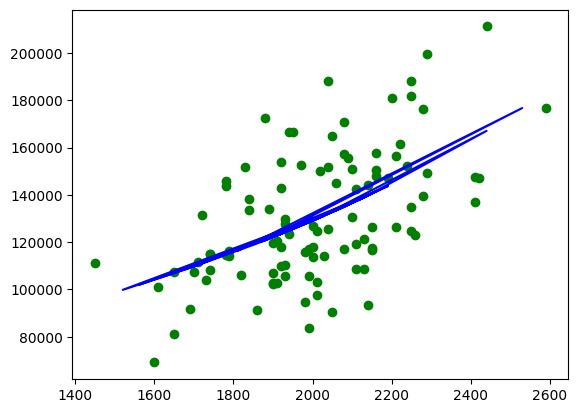

In [74]:
plt.scatter(xp_train,yp_train,color='green')

plt.plot(xp_test, polyreg.predict(polynom.fit_transform(xp_test)),color='blue')
plt.show()